<a href="https://colab.research.google.com/github/Vahid-GitHub/Optimization/blob/master/scipy_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we try to investigate some functions in Scipy optimization tools.

In [ ]:
# Optimization with scipy

In [ ]:
import numpy as np
import scipy as sp
import scipy.optimize as opt
import matplotlib.pyplot as plt
import time

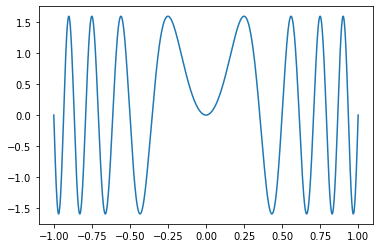

In [ ]:
def func(x):
    # return(np.pow(x, 2))
    # return(np.sin(2*np.pi*4*x))
    # return(np.sin(2*x))
    return(40*x**2*np.sinc(8*x**2))


# function
t = np.linspace(-1, 1, 1000)
ft = func(t)
plt.plot(t, ft)

Finished in 3.7461 seconds.
[ 2.18652048e-01 -7.77430351e-03 -7.06885750e-02 -1.85241425e+00
  1.25730192e+03  3.31439247e+01 -1.64759041e+04 -1.32076665e+02
 -7.56945465e+02 -4.45234737e+02  8.86737620e+05  4.63759229e+03
 -5.23160186e+06 -1.31273047e+04  1.28363263e+07  1.61350947e+04
 -1.27026440e+07 -7.70700373e+03 -1.13310888e+05 -4.60786559e+02
  5.11709386e+05  6.83891974e+03  1.56515561e+07  2.70146207e+03
  8.13760486e+05 -6.59617934e+04 -3.32055409e+07  1.01804877e+05
  2.03647282e+06 -4.78615741e+03  4.09832637e+07 -7.86163884e+04
 -3.17791926e+05  9.36182330e+03 -5.51825684e+07  6.76714262e+04
  4.35985714e+07 -4.75351999e+04 -1.05489646e+07  9.58946686e+03]
SE:  0.009428155021842813


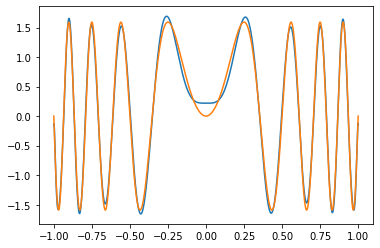

In [ ]:
def fit_func(x, *a, g=np.sin):
    y = g(a[0]*x+a[1])
    return(y)


def fit_func_2(x, *a, g=np.sin):
    # y = g(a[6] + a[2]*g(a[4]+a[0]*x)+a[3]*g(a[5]+a[1]*x))
    y = a[6] + a[2]*g(a[4]+a[0]*x)+a[3]*g(a[5]+a[1]*x)
    return(y)

def poly(x, *a, g=lambda x: x):
    y = 0
    for d, c in enumerate(a):
        y += c*g(x)**d
    return(y)

opt_func = poly

init_time = time.time()
popt, pcov = opt.curve_fit(opt_func, t, ft, p0=np.random.randn(40), maxfev=10000)
print(f'Finished in {time.time()-init_time:.4f} seconds.')
print(popt)
pred = opt_func(t, *popt)
print('SE: ', np.mean((ft-pred)**2))
plt.plot(t, pred)
plt.plot(t, ft)

Finished in 8.0697 seconds.
No solution were found.
 final_simplex: (array([[14.17969319, 34.44207444,  0.57341117, -0.69220917,  3.14159282,
         9.42477824,  0.20588808],
       [14.17969338, 34.44207423,  0.57341146, -0.69220932,  3.14159267,
         9.42477835,  0.20588814],
       [14.17969231, 34.44207418,  0.57341142, -0.69220923,  3.14159278,
         9.42477823,  0.20588799],
       [14.17969274, 34.44207411,  0.57341128, -0.69220922,  3.14159291,
         9.42477842,  0.20588815],
       [14.17969236, 34.44207399,  0.57341121, -0.69220932,  3.14159288,
         9.42477849,  0.20588793],
       [14.17969225, 34.44207389,  0.57341111, -0.69220925,  3.14159335,
         9.42477812,  0.20588801],
       [14.17969249, 34.44207373,  0.57341152, -0.69220903,  3.141593  ,
         9.42477851,  0.20588794],
       [14.17969301, 34.44207422,  0.57341128, -0.69220937,  3.14159331,
         9.4247785 ,  0.20588803]]), array([0.73555909, 0.73555909, 0.73555909, 0.73555909, 0.73555909

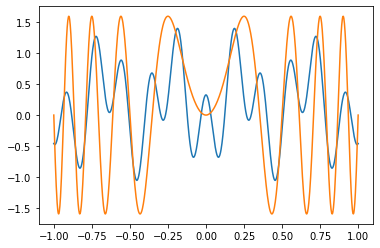

In [ ]:
opt_func = fit_func_2
# act_fun = lambda x: x
act_fun = lambda x: np.cos(x)
# act_fun = lambda x: np.tanh(x)
# act_fun = lambda x: 1 / (1+x**2) # np.max(np.vstack((np.zeros(x.size), x)), axis=0)
def mse_fit_func(a, af=act_fun, ofunc=opt_func, x=t, fx=ft):
    return(np.mean((ofunc(x, *a, g=af) - fx)**2))

max_try = 40
std = 10
mmse = 0.01
best_res = None
best_res_fun = np.inf
init_time = time.time()
for counter in range(max_try):
    x_init = std*np.random.randn(7)
    res = opt.minimize(mse_fit_func, x0=x_init, method='Nelder-Mead', tol=None,
                       options={'disp': False,
                                'xatol': 1e-6, 'fatol': 1e-6,
                                'maxiter': 3000, 'maxfev': 3000})
    if res.fun < best_res_fun:
        best_res, best_res_fun = res, res.fun
    if res.fun < mmse:
        break
print(f'Finished in {time.time()-init_time:.4f} seconds.')
if best_res_fun > mmse:
    print('No solution were found.')
else:
    print(f'Found a solution after {counter} tries.')
print(best_res)
plt.plot(t, opt_func(t, *best_res.x, g=act_fun))
plt.plot(t, ft)

Finished in 0.5554 seconds.
1.1255918391890878 [-5.00488281e-06 -1.40280273e+00]


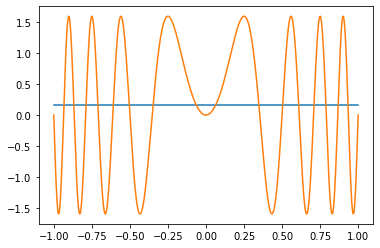

In [ ]:
opt_func = fit_func
# act_fun = lambda x: x
act_fun = lambda x: np.cos(x)
# act_fun = lambda x: np.tanh(x)
# act_fun = lambda x: 1 / (1+x**2) # np.max(np.vstack((np.zeros(x.size), x)), axis=0)
def mse_fit_func(a, af=act_fun, ofunc=opt_func, x=t, fx=ft):
    return(np.mean((ofunc(x, *a, g=af) - fx)**2))

step_size = 0.1
rranges = [slice(-4, 4, step_size)]*2
init_time = time.time()
ret = opt.brute(mse_fit_func, rranges, full_output=True, finish=opt.fmin, workers=4)
print(f'Finished in {time.time()-init_time:.4f} seconds.')

print(ret[1], ret[0])
plt.plot(t, opt_func(t, *ret[0], g=act_fun))
plt.plot(t, ft)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:1058: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


Finished in 33.0390 seconds.
                        fun: 0.8180629689211717
 lowest_optimization_result:       fun: 0.8180629689211717
 hess_inv: array([[ 6.64197499e-02,  2.04333692e+00,  3.58027594e-01,
        -7.34040348e-01, -1.97777692e-03,  1.01046095e+00,
        -1.39650398e+00],
       [ 2.04333692e+00,  6.69744029e+01,  1.24439760e+01,
        -2.25286252e+01, -7.03626812e-02,  3.16027089e+01,
        -4.45491467e+01],
       [ 3.58027594e-01,  1.24439760e+01,  2.46892628e+00,
        -3.92013362e+00, -1.32693864e-02,  5.53622229e+00,
        -7.97055194e+00],
       [-7.34040348e-01, -2.25286252e+01, -3.92013362e+00,
         9.12026726e+00,  2.22373639e-02, -1.12060673e+01,
         1.54666663e+01],
       [-1.97777692e-03, -7.03626812e-02, -1.32693864e-02,
         2.22373639e-02,  1.92575900e-04, -3.60404692e-02,
         5.05640649e-02],
       [ 1.01046095e+00,  3.16027089e+01,  5.53622229e+00,
        -1.12060673e+01, -3.60404692e-02,  1.57367928e+01,
        -2.1791

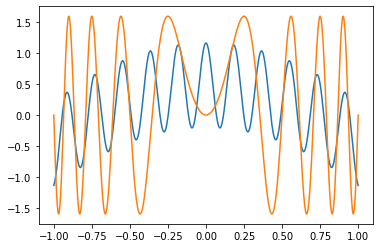

In [ ]:
opt_func = fit_func_2
# act_fun = lambda x: x
act_fun = lambda x: np.cos(x)
# act_fun = lambda x: np.tanh(x)
# act_fun = lambda x: 1 / (1+x**2) # np.max(np.vstack((np.zeros(x.size), x)), axis=0)
def mse_fit_func(a, af=act_fun, ofunc=opt_func, x=t, fx=ft):
    return(np.mean((ofunc(x, *a, g=af) - fx)**2))

x_init = np.random.randn(7)
init_time = time.time()
ret = opt.basinhopping(mse_fit_func, x0=x_init, niter=500, niter_success=None, interval=30, T=0.1, 
                       stepsize=1, disp=False)
print(f'Finished in {time.time()-init_time:.4f} seconds.')
print(ret)
plt.plot(t, opt_func(t, *ret.x, g=act_fun))
plt.plot(t, ft)

Finished in 3.1642 seconds.
     fun: 0.7595704615656593
     jac: array([ 2.79776202e-06, -1.54321000e-06, -7.74935671e-06, -3.66373598e-07,
       -1.88737914e-06, -5.00710584e-06,  5.48450174e-06])
 message: 'Optimization terminated successfully.'
    nfev: 22566
     nit: 213
 success: True
       x: array([ 2.29741033e+01, -1.48856321e+01,  6.68504191e-01,  6.34023177e-01,
       -2.97533586e-06, -2.82743456e+01,  2.22480350e-01])


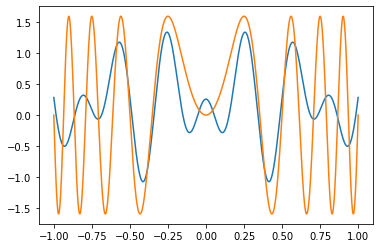

In [ ]:
opt_func = fit_func_2
# act_fun = lambda x: x
act_fun = lambda x: np.cos(x)
# act_fun = lambda x: np.tanh(x)
# act_fun = lambda x: 1 / (1+x**2) # np.max(np.vstack((np.zeros(x.size), x)), axis=0)
def mse_fit_func(a, af=act_fun, ofunc=opt_func, x=t, fx=ft):
    return(np.mean((ofunc(x, *a, g=af) - fx)**2))

bound = (-30, 30)
bounds = [bound]*7
init_time = time.time()
res = opt.differential_evolution(mse_fit_func, bounds)
print(f'Finished in {time.time()-init_time:.4f} seconds.')

print(res)
plt.plot(t, opt_func(t, *res.x, g=act_fun))
plt.plot(t, ft)

Finished in 2.0094 seconds.
     fun: 0.7652399996961584
 message: ['Maximum number of iteration reached']
    nfev: 14641
    nhev: 0
     nit: 1000
    njev: 0
  status: 0
 success: True
       x: array([-14.52099299,  38.4276015 ,   0.5782902 ,  -0.6460049 ,
       -97.3893723 ,  25.13274123,   0.2155049 ])


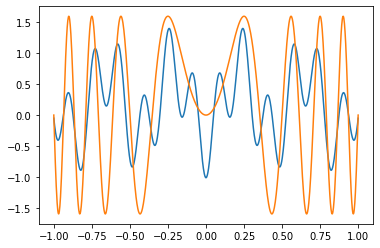

In [ ]:
opt_func = fit_func_2 # poly
# act_fun = lambda x: x
act_fun = lambda x: np.cos(x)
# act_fun = lambda x: np.tanh(x)
# act_fun = lambda x: 1 / (1+x**2) # np.max(np.vstack((np.zeros(x.size), x)), axis=0)
def mse_fit_func(a, af=act_fun, ofunc=opt_func, x=t, fx=ft):
    return(np.mean((ofunc(x, *a, g=af) - fx)**2))

bound = (-100, 100)
bounds = [bound]*7
init_time = time.time()
res = opt.dual_annealing(mse_fit_func, bounds, maxiter=1000)
print(f'Finished in {time.time()-init_time:.4f} seconds.')

print(res)
plt.plot(t, opt_func(t, *res.x, g=act_fun))
plt.plot(t, ft)